## 1. Read Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin')

## 2. Basic Data Cleanup

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(df.iloc[:, 2:5], inplace=True, axis=1)

In [6]:
# df.head()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.duplicated().sum()

403

In [9]:
df=df.drop_duplicates(keep='first')

In [10]:
df.shape

(5169, 2)

In [11]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
df.rename({'v1':'spam','v2':'text'},axis=1,inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['spam'] = le.fit_transform(df['spam'])

In [14]:
df.head()

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 3. EDA (Exploratory Data Analysis)

In [15]:
df['spam'].value_counts()

spam
0    4516
1     653
Name: count, dtype: int64

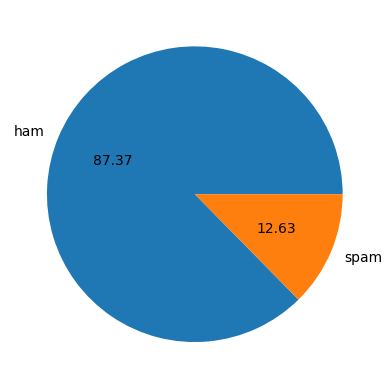

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()
# Data is imbalanced

In [17]:
import nltk

import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

nltk.download('punkt')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_chars']=df['text'].apply(len)
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,spam,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# Description of ham
df[df['spam']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# Description of spam
df[df['spam']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

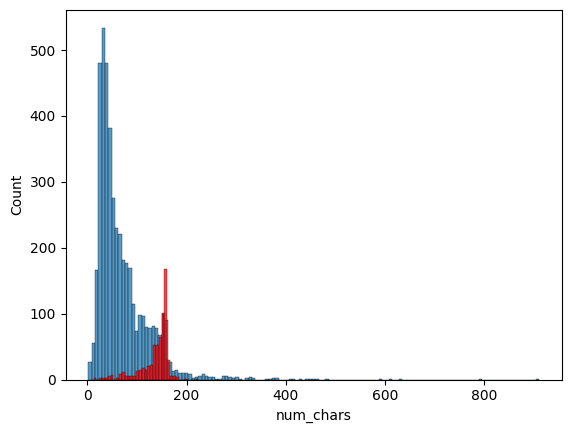

In [22]:
import seaborn as sns
sns.histplot(df[df['spam']==0]['num_chars'])
sns.histplot(df[df['spam']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

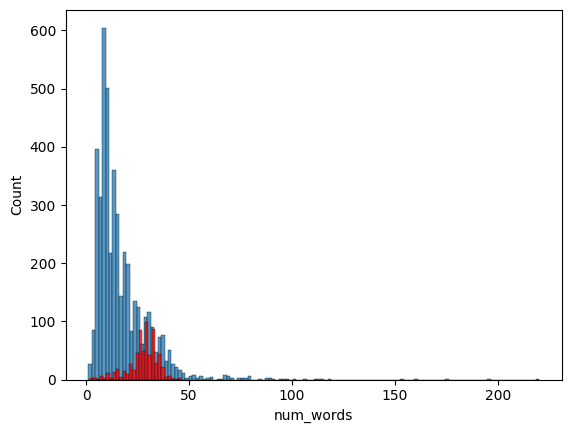

In [23]:
sns.histplot(df[df['spam']==0]['num_words'])
sns.histplot(df[df['spam']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

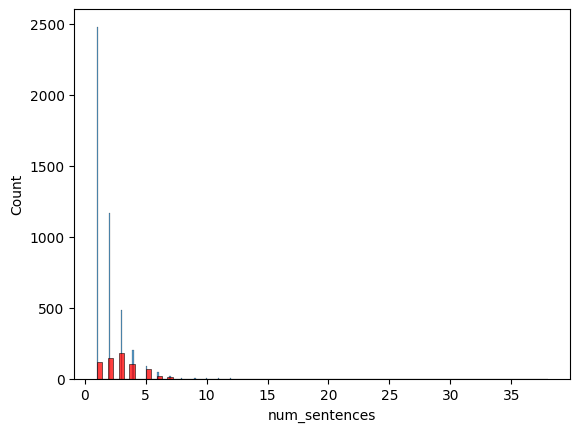

In [24]:
sns.histplot(df[df['spam']==0]['num_sentences'])
sns.histplot(df[df['spam']==1]['num_sentences'],color='red')

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


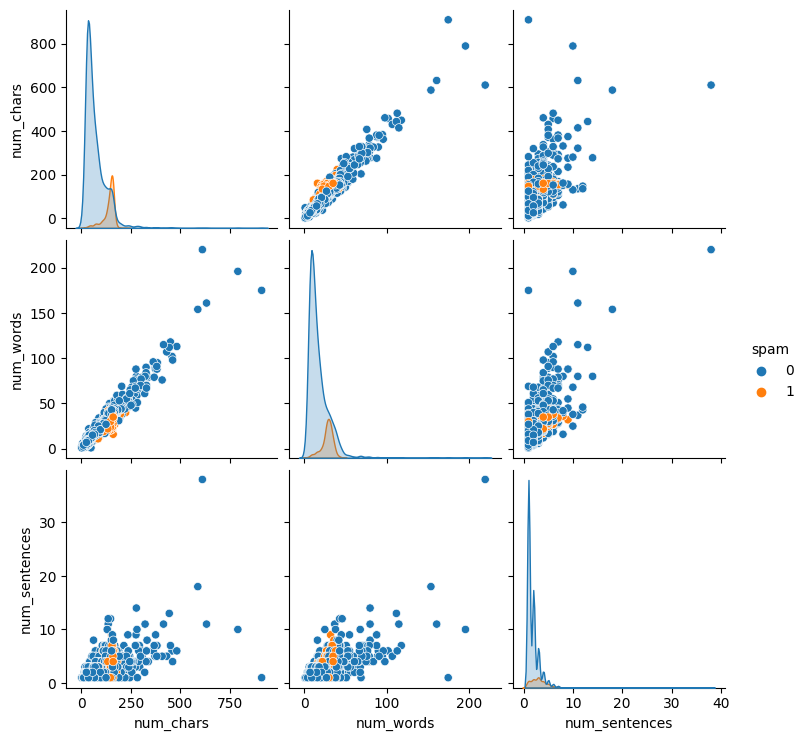

In [25]:
sns.pairplot(df,hue='spam')

In [26]:
df.head()

,spam,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
newdf=df.copy()
newdf.head()


,spam,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df.head()

,spam,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
newdf.drop(['text'],axis=1,inplace=True)   # for finding correlation, we need to remove string values

<Axes: >

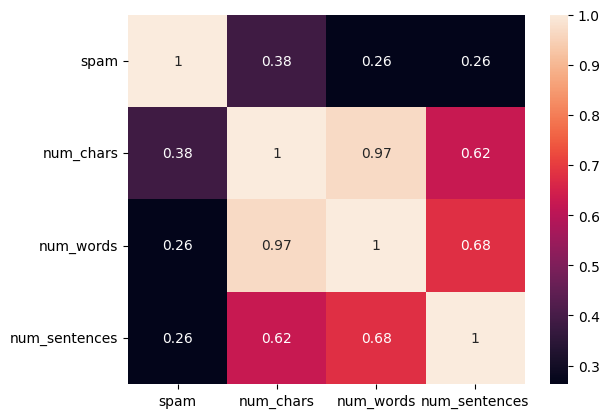

In [30]:
sns.heatmap(newdf.corr(),annot=True)

In [31]:
# So number of characters, words and sentences have very strong correlation coeff. So we only need to take on of these columns. Let's take num_chars because its correlation coeff with spam is highest amongst the three.

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special chars
- Removing stop words and punctuation
- Stemming

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
#stopwords.words('english')    #words that are used in the sentences but don't add to or change their meaning


In [34]:
#string.punctuation

In [35]:
ps=PorterStemmer()    
# ps.stem('raining')    # coverts all the degrees and related words of a word to their simplest for

In [36]:
def transformText(text):
    
    text=text.lower()     # convert to lower

    text=nltk.word_tokenize(text)  # break down sentence into words

    y=[]   #list
    for i in text:
        if i.isalnum():   # remove special characters
            y.append(i)
    text=y[:]   # to copy list into string we need to clone it. we will return y only, this is for further processing
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:   # remove stopwords and punctuations
            y.append(i)   # all the processed data of text is now stored in y
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [37]:
transformText("I loved the YT lectures on Machine Learning. What about you?")

'love yt lectur machin learn'

In [38]:
df['transformed_text']=df['text'].apply(transformText)

In [39]:
df.head()

,spam,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=400,height=400,min_font_size=10,background_color='black')

In [41]:
spam_wc=wc.generate(df[df['spam']==1]['transformed_text'].str.cat(sep=" "))
# generates a WordCloud object by taking that data from transformed text whose spam value is one and concating it to a string

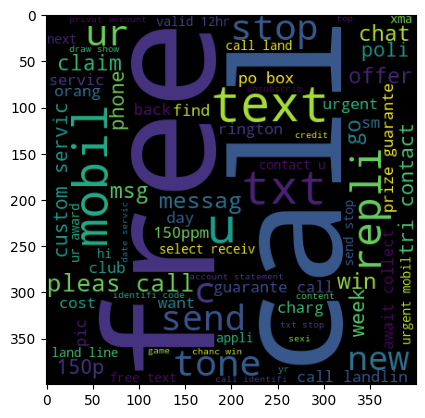

In [42]:
plt.imshow(spam_wc)

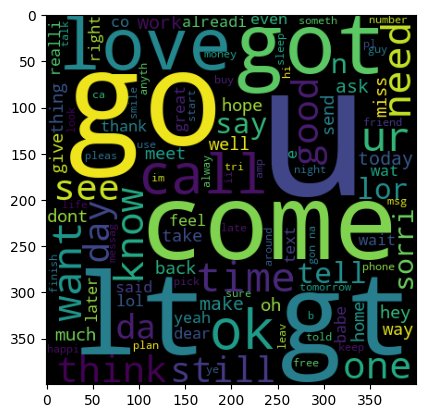

In [43]:
spam_wc=wc.generate(df[df['spam']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [44]:
x = df[df['spam'] == 1]['transformed_text'].str.cat(sep= " ")
spam_msg_word_list = x.split()
len(spam_msg_word_list)

9939

In [45]:
from collections import Counter
spam_top_30words = pd.DataFrame(Counter(spam_msg_word_list).most_common(30))
spam_top_30words


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


## 4. Model Building

In [46]:
# First convert the string t=input text into numbers or vectors (Vectorization)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [47]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [48]:
Y=df['spam'].values

In [49]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [52]:
gnb.fit(x_train,y_train)
pred1=gnb.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))
print(f1_score(y_test,pred1))

# with cv
# 0.8800773694390716
# [[792 104]
#  [ 20 118]]
# 0.5315315315315315
# 0.6555555555555556

# with tfidf
# 0.8762088974854932
# [[793 103]
#  [ 25 113]]
# 0.5231481481481481
# 0.6384180790960452

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932
0.6218487394957983


In [53]:
mnb.fit(x_train,y_train)
pred2=mnb.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))
print(f1_score(y_test,pred2))

# with cv
# 0.9642166344294004
# [[871  25]
#  [ 12 126]]
# 0.8344370860927153
# 0.8719723183391004

# with tfidf
# 0.9593810444874274
# [[896   0]
#  [ 42  96]]
# 1.0
# 0.8205128205128205

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
0.878048780487805


In [54]:
bnb.fit(x_train,y_train)
pred3=bnb.predict(x_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))
print(f1_score(y_test,pred3))

# with cv
# 0.9700193423597679
# [[893   3]
#  [ 28 110]]
# 0.9734513274336283
# 0.8764940239043825

# with tfidf
# 0.9700193423597679
# [[893   3]
#  [ 28 110]]
# 0.9734513274336283
# 0.8764940239043825

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
0.9348659003831418


In [55]:
# So we go with mnb x tfidf as the data is imbalanced so accuracy is not a good measure. But precision is. Now, we are going to check some other models also

In [56]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
# from xgboost import XGBClassifier

In [57]:
# lg = LogisticRegression(penalty='l1',solver='liblinear')
# sv = SVC(kernel='sigmoid',gamma=1.0)
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# knn = KNeighborsClassifier()
# rfc = RandomForestClassifier(n_estimators=50,random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
# abc = AdaBoostClassifier(n_estimators=50,random_state=2)
# bg = BaggingClassifier(n_estimators=50,random_state=2)
# gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [58]:
# clfs= {
#     'LR':lg,
#     'SVM':sv,
#     'MNB':mnb,
#     'DTC':dtc,
#     'KNN':knn,
#     'RFC':rfc,
#     'ETC':etc,
#     'ABC':abc,
#     'BG':bg,
#     'GBC':gbc,
#     'XGB':xgb
# }
# clfs

In [59]:
# Defining a function to fit and predict
# def score_prediction(model,X_train,X_test,y_train,y_test):
#     model.fit(X_train,y_train)
#     pr = model.predict(X_test)
#     acc_score = accuracy_score(y_test,pr)
#     pre_score = precision_score(y_test,pr)
#     f_score = f1_score(y_test,pr)
#     return acc_score,pre_score,f_score

In [60]:
# model evaluations by looping through the dictionary, applying above function to each name in it
# acc_score = []
# pre_score = []
# f_socre = []

# for name,clf in clfs.items():
#     current_score,current_precision,current_f = score_prediction(clf,x_train,x_test,y_train,y_test)
   
#     acc_score.append(current_score)
#     pre_score.append(current_precision)
#     f_socre.append(current_f)

In [61]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_score,'Precision':pre_score,'F1':f_socre}).sort_values('Precision',ascending=False)

In [62]:
# performance_df

In [63]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [64]:
# performance_df1

In [65]:
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [66]:
# Improving the model

In [67]:
# Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [68]:
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [69]:
# voting.fit(x_train,y_train)

In [70]:
# y_pred = voting.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [71]:
# Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

In [72]:
# from sklearn.ensemble import StackingClassifier

In [73]:
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [74]:
# clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [75]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [76]:
# Since we are more concerned about precision, which was best given with best accuracy by mnb, we will choose it
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))